## Multiple Linear Regression - Housing case study

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Loading the data:

In [3]:
# reading the file
housing_df = pd.read_csv('Housing.csv')
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# shape of the dataframe
housing_df.shape

(545, 13)

In [5]:
# info of dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [6]:
# describe dataframe
housing_df.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
10%,2.835000e+06,3000.000000,2.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
90%,7.350000e+06,7980.000000,4.000000,2.000000,3.000000,2.000000
99%,1.054200e+07,12543.600000,5.000000,3.000000,4.000000,3.000000


#### Visualizing the data:

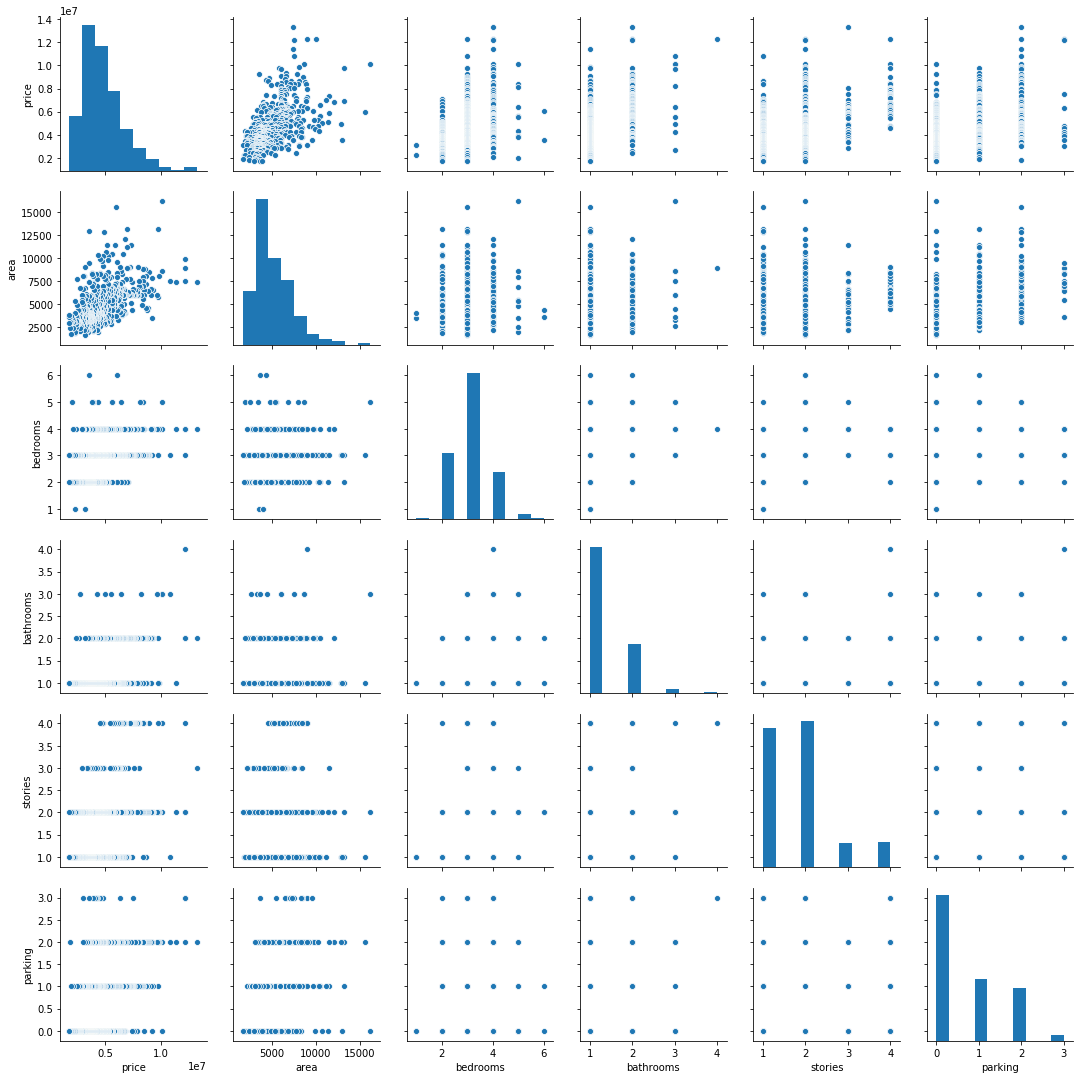

In [7]:
#pair plot of numerical variable
sns.pairplot(data = housing_df)

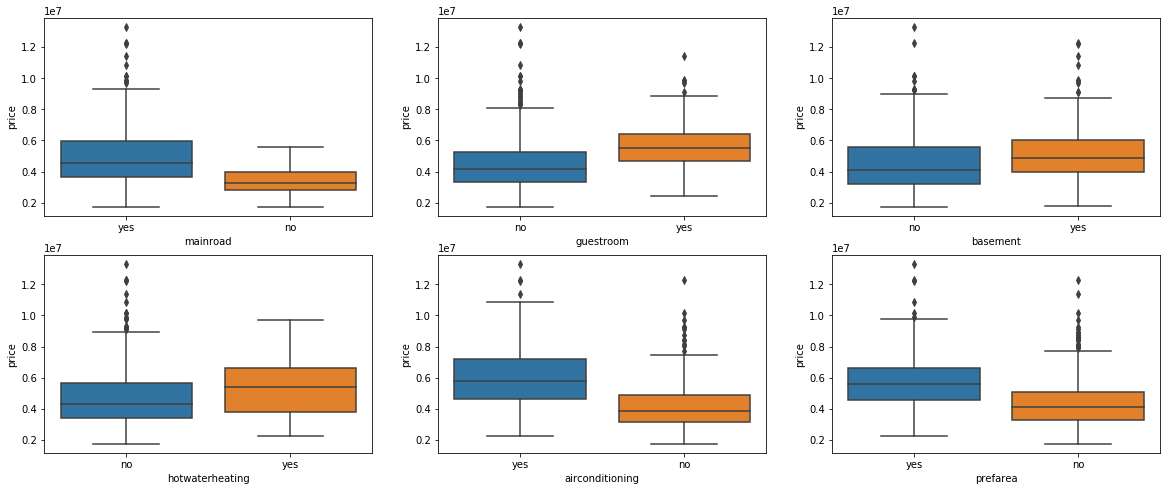

In [8]:
#categorical variables
plt.figure(figsize = (20,8))

plt.subplot(2,3,1)
sns.boxplot(x ='mainroad', y = 'price', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x ='guestroom', y = 'price', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x ='basement', y = 'price', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x ='hotwaterheating', y = 'price', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x ='airconditioning', y = 'price', data = housing_df)
plt.subplot(2,3,6)
sns.boxplot(x ='prefarea', y = 'price', data = housing_df)

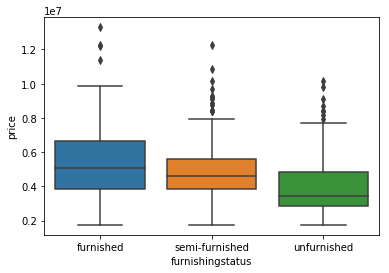

In [9]:
sns.boxplot(x ='furnishingstatus', y = 'price', data = housing_df)

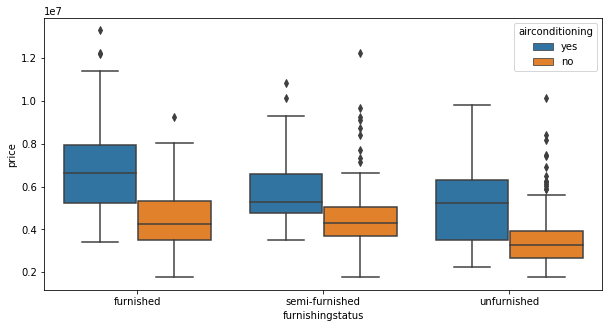

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(x ='furnishingstatus', y = 'price', hue = 'airconditioning',data = housing_df)

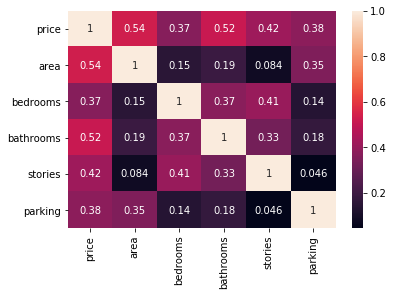

In [11]:
sns.heatmap(housing_df.corr(),annot = True)

We see high correlation between price, area and bathrooms.

#### Data preparation:

In [12]:
# converting yes to 1 and 'No' to 0
varaible_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1 , 'no':0})

housing_df[varaible_list] = housing_df[varaible_list].apply(binary_map)

In [13]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Dummy variables:

In [14]:
# let us create a dummy variable for furnishing status as 3 level values

status = pd.get_dummies(housing_df['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
housing_df = pd.concat([housing_df,status], axis =1)

In [16]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [17]:
housing_df.drop(['furnishingstatus'], axis =1, inplace = True)

In [18]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Splitting the data into Test Train split

In [19]:
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.shape

(381, 14)

#### Rescaling the features:

In [21]:
scaler = MinMaxScaler()

#applying the scaler only to below variables
num_var= ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [22]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [23]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values are in the range 0 and 1.

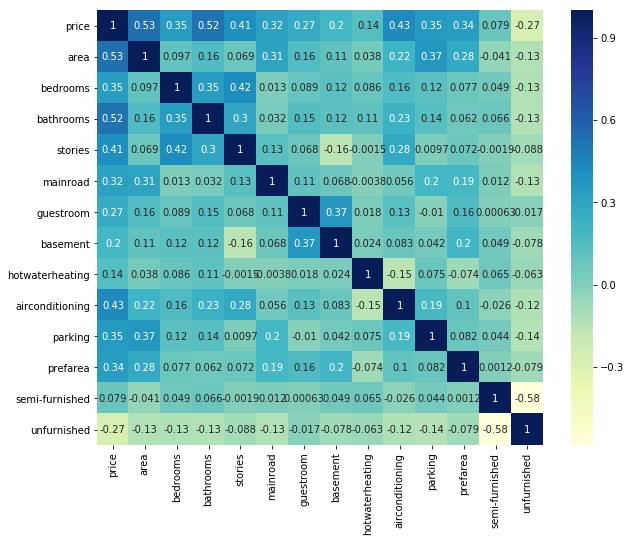

In [24]:
# let us check the correlation of train data
plt.figure(figsize = (10,8))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')

We see high correlation between price and area, price and bathrooms, bedrooms with bathrooms and stories and many more.

#### Dividing X and Y for model building:

In [25]:
y_train = df_train.pop('price')
X_train = df_train

#### Building a linear model:

We will be using two methods:
    1. using statsmodels.api
    2. using RFE

#### Method 1: using statsmodels.api

In [26]:
import statsmodels.api as sm

##### Let us build by bottom-up approach for i.e. we will start by building the model with just one variable:

In [27]:
#area
X_train_sm = sm.add_constant(X_train[['area']])

lr_1 = sm.OLS(y_train, X_train_sm).fit()

In [28]:
lr_1.params

const    0.126894
area     0.462192
dtype: float64

In [29]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           3.15e-29
Time:                        17:50:02   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

Variable 'Area' just explains 28% variance.

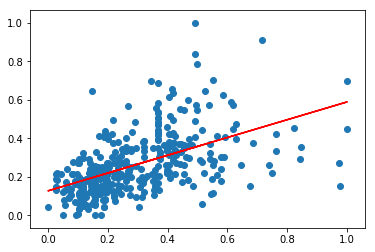

In [30]:
plt.scatter(X_train_sm.iloc[:,1], y_train)
plt.plot(X_train_sm.iloc[:,1],0.126894 + 0.462192*X_train_sm.iloc[:,1], 'r')
plt.show()

Though the line is passing through the data, we see that 'area' could explain only 28% variance. So let us add another variable.

In [31]:
#area and bathrooms

X_train_sm = sm.add_constant(X_train[['area', 'bathrooms']])

lr_2 = sm.OLS(y_train, X_train_sm).fit()

In [32]:
lr_2.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [33]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           2.51e-54
Time:                        17:50:02   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

Adjusted R-squared increased from 28.1% to 47.7%. Let us add one more variable and check:

In [34]:
#area ,bathrooms and bedrooms

X_train_sm = sm.add_constant(X_train[['area','bedrooms','bathrooms']])

lr_3 = sm.OLS(y_train, X_train_sm).fit()

In [35]:
lr_3.params

const        0.041352
area         0.392211
bedrooms     0.181863
bathrooms    0.259978
dtype: float64

In [36]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           3.12e-57
Time:                        17:50:02   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

#### Let us do the other way- Let us build the model by adding all the variables to the model and drop those which are insignificant:

In [37]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [38]:
X_train_sm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_sm).fit()

In [39]:
lr_4.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [40]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           8.83e-83
Time:                        17:50:02   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

We see that, certain varaibles have p- values > 0.05. Before dropping any variables, let us check VIF as well:

#### VIF:

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"]  = round(vif["VIF"], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


Let us drop variable `semi-furnished` as p-value of semi-furnished is 0.938

In [43]:
#dropping the variable semi-furnished

X = X_train.drop('semi-furnished', axis =1)

In [44]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [45]:
X_sm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_sm).fit()

In [46]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.07e-83
Time:                        17:50:03   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

Now bedrooms and basement looks insignificant. Let us check VIF

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [48]:
# Let us drop bedrooms
X = X.drop('bedrooms', axis =1)

In [49]:
X_sm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_sm).fit()

In [50]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           2.73e-84
Time:                        17:50:03   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

p-values of all variables looks fine. Let us check VIF.

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


#### Residual Analysis of the train data

In [52]:
y_train_pred = lr_6.predict(X_sm)

In [53]:
residual = y_train- y_train_pred

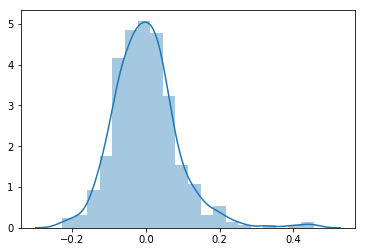

In [54]:
sns.distplot(residual, bins =20)

Error terms are normally distributed.

#### Making Predictions Using the Final Model:

In [55]:
# these variables we scaled in Train data..so let us scale the same variables in test data as well.
num_var= ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_test[num_var] = scaler.transform(df_test[num_var])

In [56]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test = df_test.pop('price')
X_test = df_test

In [58]:
X_test_sm = sm.add_constant(X_test)

In [59]:
X_test_sm = X_test_sm.drop(['semi-furnished','bedrooms'], axis =1)

In [60]:
y_pred = lr_6.predict(X_test_sm)

#### Model Evaluation:

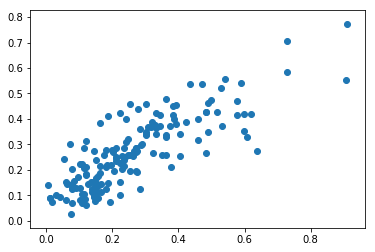

In [61]:
plt.scatter(y_test, y_pred)

In [62]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           2.73e-84
Time:                        17:50:04   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒=0.234×𝑎𝑟𝑒𝑎+0.1965×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.03×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.02×basement+
0.086×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.066×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0596×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0323×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑

#### Method 2: using RFE

#### Splitting the data into Test Train split

In [63]:
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size =0.3, random_state =100)

In [64]:
df_train.shape

(381, 14)

In [65]:
df_test.shape

(164, 14)

#### Scaling of the data:

In [66]:
var_list = ['price','area', 'bedrooms','bathrooms', 'stories','parking']

scaler = MinMaxScaler()

df_train[var_list] = scaler.fit_transform(df_train[var_list])

In [67]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing X and Y for model building:

In [68]:
y_train = df_train.pop('price')
X_train = df_train

#### RFE

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [72]:
support_col = X_train.columns[rfe.support_]
support_col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [73]:
discarded_col = X_train.columns[~rfe.support_]
discarded_col

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

#### Building the model using statsmodel using supported columns:

In [74]:
X_train_rfe = X_train[support_col]

In [75]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [76]:
lr_rfe = sm.OLS(y_train,X_train_rfe_sm ).fit()

In [77]:
lr_rfe.params

const              0.002721
area               0.236257
bedrooms           0.066102
bathrooms          0.198169
stories            0.097722
mainroad           0.055649
guestroom          0.038136
hotwaterheating    0.089673
airconditioning    0.071079
parking            0.063739
prefarea           0.064326
dtype: float64

In [78]:
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.28e-82
Time:                        17:50:05   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

Variable `bedrooms` is insignificant

In [79]:
X_train_rfe_1 = X_train_rfe.drop(['bedrooms'], axis =1)

In [80]:
X_train_rfe_new = sm.add_constant(X_train_rfe_1)

In [81]:
lr_rfe_1 = sm.OLS(y_train,X_train_rfe_new).fit()

In [82]:
print(lr_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           6.67e-83
Time:                        17:50:05   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

All the p-values look significant . Let us check VIF

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,area,4.516773
3,mainroad,4.263472
2,stories,2.120356
7,parking,2.096114
6,airconditioning,1.748100
1,bathrooms,1.578669
8,prefarea,1.466057
4,guestroom,1.300287
5,hotwaterheating,1.121364


#### Residual analysis

In [84]:
y_train_pred = lr_rfe_1.predict(X_train_rfe_new)

res = y_train - y_train_pred

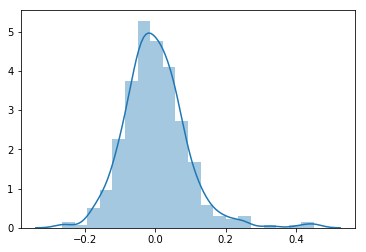

In [85]:
sns.distplot(res, bins =20)

Error terms are normally distributed.

#### Making Predictions Using the Final Model

In [86]:
var_list = ['price','area', 'bedrooms','bathrooms', 'stories','parking']


df_test[var_list] = scaler.transform(df_test[var_list])

In [87]:
y_test = df_test.pop('price')
X_test = df_test

In [88]:
col = X_train_rfe_1.columns

In [89]:
X_test_new = X_test[col]

In [90]:
X_test_new.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [91]:
X_test_rfe = sm.add_constant(X_test_new)

In [92]:
y_pred = lr_rfe_1.predict(X_test_rfe)

#### Model Evaluation

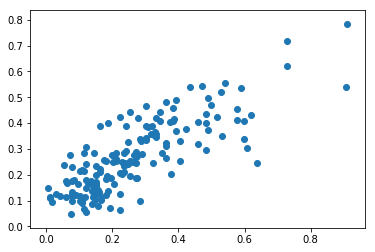

In [93]:
plt.scatter(y_test, y_pred)

In [95]:
print(lr_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           6.67e-83
Time:                        18:00:01   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

We can see that the equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒=0.234×𝑎𝑟𝑒𝑎+0.2070×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.039×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+ 0.092×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.071×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0669×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0653×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎